
==== Q1 ====
Cleaned text: i love exploring new technologies artificial intelligence and machine learning are fascinating fields that keep evolving every day i enjoy reading books experimenting with code and sharing knowledge
Sentences: ['I love exploring new technologies!', 'Artificial Intelligence and Machine Learning are fascinating fields that keep evolving every day.', 'I enjoy reading books, experimenting with code, and sharing knowledge.']
Words using split(): ['i', 'love', 'exploring', 'new', 'technologies', 'artificial', 'intelligence', 'and', 'machine', 'learning', 'are', 'fascinating', 'fields', 'that', 'keep', 'evolving', 'every', 'day', 'i', 'enjoy', 'reading', 'books', 'experimenting', 'with', 'code', 'and', 'sharing', 'knowledge']
Words using word_tokenize(): ['i', 'love', 'exploring', 'new', 'technologies', 'artificial', 'intelligence', 'and', 'machine', 'learning', 'are', 'fascinating', 'fields', 'that', 'keep', 'evolving', 'every', 'day', 'i', 'enjoy', 'reading', 'bo

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


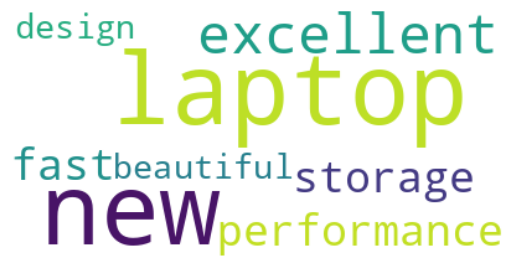


==== Q6 ====
Model trained.
Generated text: artificial intelligence intelligence an


In [4]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# ======================== Q1 ==========================
print("\n==== Q1 ====")
text = "I love exploring new technologies! Artificial Intelligence and Machine Learning are fascinating fields that keep evolving every day. I enjoy reading books, experimenting with code, and sharing knowledge."

# Lowercase & remove punctuation
text_cleaned = re.sub(r'[^\w\s]', '', text.lower())
print("Cleaned text:", text_cleaned)

# Tokenize into sentences & words
sentences = sent_tokenize(text)
words_split = text_cleaned.split()
words_nltk = word_tokenize(text_cleaned)

print("Sentences:", sentences)
print("Words using split():", words_split)
print("Words using word_tokenize():", words_nltk)
print("Difference → split(): splits by space only; word_tokenize(): handles contractions/punctuation etc.")

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_nltk if word not in stop_words]
print("Filtered words (no stopwords):", filtered_words)

# Frequency distribution
freq_dist = nltk.FreqDist(filtered_words)
print("Word Frequency (excluding stopwords):")
for word, freq in freq_dist.items():
    print(f"{word}: {freq}")

# ======================== Q2 ==========================
print("\n==== Q2 ====")
# Extract words with only alphabets
alpha_words = re.findall(r'\b[a-zA-Z]+\b', text_cleaned)
print("Alphabet-only words:", alpha_words)

# Remove stopwords
filtered_alpha_words = [word for word in alpha_words if word not in stop_words]
print("Filtered alpha words:", filtered_alpha_words)

# Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_alpha_words]
print("Stemmed words:", stemmed_words)

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_alpha_words]
print("Lemmatized words:", lemmatized_words)

# Comparison
print("Comparison → Stemming may chop words (e.g., 'technolog' vs 'technology'); Lemmatization returns valid dictionary words → prefer lemmatization when readability/valid words needed, stemming when simplicity/speed matters.")

# ======================== Q3 ==========================
print("\n==== Q3 ====")
texts_q3 = [
    "AI is transforming industries with automation and insights.",
    "The new smartphone has an amazing camera and battery life.",
    "Climate change is a serious challenge for global sustainability."
]

# CountVectorizer
cv = CountVectorizer()
cv_matrix = cv.fit_transform(texts_q3)
print("Bag of Words:")
print(cv_matrix.toarray())

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts_q3)
feature_names = tfidf.get_feature_names_out()

for i, text_vec in enumerate(tfidf_matrix):
    sorted_indices = np.argsort(text_vec.toarray()[0])[::-1]
    top_words = [feature_names[idx] for idx in sorted_indices[:3]]
    print(f"Top 3 keywords in text {i+1}:", top_words)

# ======================== Q4 ==========================
print("\n==== Q4 ====")
text1 = "Artificial Intelligence is changing the world with machine learning and deep learning."
text2 = "Blockchain is revolutionizing finance and supply chains with decentralized technology."

# Preprocess & tokenize
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return word_tokenize(text)

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

set1 = set(tokens1)
set2 = set(tokens2)

# Jaccard similarity
jaccard = len(set1 & set2) / len(set1 | set2)
print(f"Jaccard Similarity: {jaccard:.4f}")

# Cosine similarity
vectorizer = TfidfVectorizer()
tfidf_matrix_q4 = vectorizer.fit_transform([text1, text2])
cos_sim = cosine_similarity(tfidf_matrix_q4[0:1], tfidf_matrix_q4[1:2])
print(f"Cosine Similarity: {cos_sim[0][0]:.4f}")

print("Analysis → Cosine captures similarity even with different words expressing similar topics; Jaccard is stricter based on exact overlap → for semantic similarity, cosine is better here.")

# ======================== Q5 ==========================
print("\n==== Q5 ====")
review = "The new laptop has excellent performance, fast storage, and beautiful design."

blob = TextBlob(review)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity
print(f"Polarity: {polarity:.2f}, Subjectivity: {subjectivity:.2f}")

# Classify sentiment
if polarity > 0:
    sentiment = "Positive"
elif polarity < 0:
    sentiment = "Negative"
else:
    sentiment = "Neutral"
print(f"Sentiment: {sentiment}")

# WordCloud (if positive)
if sentiment == "Positive":
    wc = WordCloud(width=400, height=200, background_color='white').generate(review)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# ======================== Q6 ==========================
print("\n==== Q6 ====")
text_train = "Artificial intelligence is an exciting field. It involves machine learning, natural language processing, and computer vision. Researchers build models that can learn from data."

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_train])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
words = text_train.lower().split()
for i in range(1, len(words)):
    seq = words[:i+1]
    token_list = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    input_sequences.append(token_list)

# Pad sequences
max_seq_len = max(len(seq) for seq in input_sequences)
padded = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Labels (next word)
xs = padded[:, :-1]
labels = padded[:, -1]
labels = np.array(labels)

# Model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=xs.shape[1]))
model.add(LSTM(50))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# Train
model.fit(xs, labels, epochs=300, verbose=0)
print("Model trained.")

# Generate text
seed_text = "artificial"
next_words = 3
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=xs.shape[1], padding='pre')
    predicted = model.predict(token_list, verbose=0)
    output_word = tokenizer.index_word[np.argmax(predicted)]
    seed_text += " " + output_word
print("Generated text:", seed_text)
